### Implementation of logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#read dataset
df1 = pd.read_csv('titanic_train.csv', index_col = False)

In [3]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#convert the column names to lowercase
df1.columns = df1.columns.str.lower()

In [5]:
#take a random sample of 20 data points.
df1_sample = df1.sample(n=30)
df1_sample = df1_sample.loc[:,['survived','pclass','sex','age','fare']]

In [28]:
#divide the dataframe into survival categories- 1- survived; 0-not survived
survival_categories = df1_sample.groupby('survived')
#view the keys
survival_categories.groups.keys()

dict_keys([0, 1])

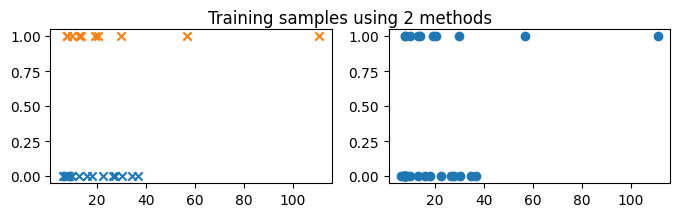

In [48]:
#Plot for the data points
fig, ax = plt.subplots(1, 2, figsize = (8,2))
colors = ('red', 'blue')

for name, group in groups:
    ax[0].scatter(group['fare'], group['survived'], marker = 'x', label = name)

#Subplot 2
ax[1].scatter(df1_sample.loc[:,'fare'], df1_sample.loc[:,'survived'])

fig.suptitle("Training samples using 2 methods")
plt.show()


In [36]:
#selecting relevant columns and dividing into input and target values.
xtrain = df1_sample.loc[:,['pclass','sex','age','fare']]
ytrain = df1_sample.loc[:,'survived']
#Convert Gender column from text to numeric- Male-0, female-1
xtrain['sex_encoded'] = np.where(xtrain['sex'] == "female", 1, 0)

In [37]:
#remove the text gender column
xtrain = xtrain.drop(['sex'], axis = 1)

In [38]:
xtrain.head(5)

,pclass,age,fare,sex_encoded
734,2,23.0,13.0000,0
810,3,26.0,7.8875,0
508,3,28.0,22.5250,0
283,3,19.0,8.0500,0
96,1,71.0,34.6542,0


In [ ]:
# z = np.arange(-20, 20)
# gz = 1/(1 + np.exp(-z))
# np.c_[z, gz]

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize = (5, 3))
# ax.plot(z, gz, c = "red")
# ax.axvline(x = 0, c = "b", ymin = min(gz), ymax = max(gz), linestyle = ":")
# plt.show()

In [ ]:
#sample data to show plot in next chunk
x0 = np.arange(0, 6)
x1 = 3 - x0
np.c_[x0, x1]

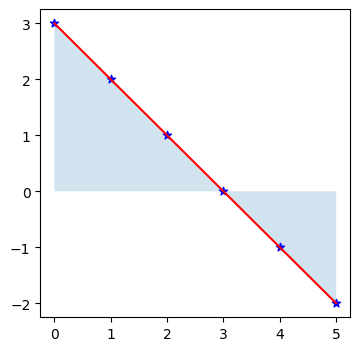

In [21]:
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(x0, x1, c = "r")
ax.fill_between(x0, x1, alpha= 0.2)
ax.scatter(x0, x1, c = "blue", marker = "*")
plt.show()

In [49]:
#function to compute logistic cost
def compute_log_cost(xtrain, ytrain, w, b, reg_coeff):
    """
    Objective- Compute and return the logistic cost
    Arguments-
    xtrain (2-D matrix)- training samples
    ytrain (1-D array)- target outputs
    w (1-D array)- weights parameter
    b (scalar)- bias
    reg_coeff- regularization coefficient lambda
    """
    m, n = xtrain.shape
    cost = 0.0
    reg = 0.0
    for i in range(m):
        fx = np.dot(xtrain[i],w) + b
        gz = sigmoid(fx)
        loss = ytrain[i]*np.log(gz) + (1 - ytrain[i])*np.log(1 - gz)
        cost = cost + loss
    cost = cost/m
    
    #calculating regularization term
    for j in range(n):
        reg = reg + w[j]**2
    
    reg = reg * (reg_coeff/(2*m))
    total_cost = cost + reg
    return total_cost


In [77]:
#function to compute gradient
def compute_gradient(xtrain, ytrain, w, b):
    m,n = xtrain.shape
    dj_dw, dj_db = [], []
    for i in range(m):
        fx = np.dot(xtrain.iloc[i], w) + b
        gz = sigmoid(fx)
        err = gz - ytrain.iloc[i]
        for j in range(n):
            dj_dw[j] = dj_dw + err*xtrain.iloc[i][j]
        dj_dw = dj_dw + err
    #average
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

In [65]:
def gradient_descent(xtrain, ytrain,w, b, alpha, iters, reg_coeff, compute_cost, compute_gradient):
    w_in, b_in = w, b
    J_history, w_history, b_history = [], [] ,[]
    m,n = xtrain.shape
    #regularization constant.
    reg_term = 1 - alpha*(reg_coeff/m)
    for i in range(iters):
        
        #compute gradient
        dj_dw, dj_db = compute_gradient(xtrain, ytrain, w_in, b_in)
        #simultaneous update
        w_in = w_in*reg_term - alpha*dj_dw
        b_in = b_in - dj_db
        
        #save cost and parameters history
        if i < 100000:
            J_history.append(compute_cost(xtrain, ytrain, w, b))
            w_history.append(w_in)
            b_history.append(b_in)
        
    return J_history, w_history, b_history, w_in, b_in

In [52]:
#sigmoid function
def sigmoid(x):
    """
    Objective- compute the sigmoid value of given input
    Argument- x (scalar/1-d array)- training sample(s)
    Returns- scalar/1-d vector of sigmoid values.
    """

    gz = 1/(1 + np.exp(-x))
    
    return gz

In [57]:
#normalize the dataset
def normalize(df):
    """
    Objective- normalize the given dataframe.
    Argument- df (1-d array)
    Return- normalized dataframe, normalizing mean and standard deviation
    """
    norm_mean = np.mean(df, axis = 0)
    norm_sd = np.std(df, axis = 0)
    norm_df = (df - norm_mean)/norm_sd
    
    return norm_mean, norm_sd, norm_df

In [58]:
#Normalizing the dataset-----NaN values returned in age column!!!
norm_mean, norm_sd, norm_xtrain = normalize(xtrain)

In [62]:
#Some other initializations
alpha = 0.01
lambda_ = 0.001
w = np.zeros(xtrain.shape[1])
b = 0
iters = 100

In [78]:
#call to gradient descnet
J_history, w_history, b_history, final_w, final_b = gradient_descent(xtrain, ytrain,w, b, 
                                                                     alpha, iters, lambda_, compute_log_cost, compute_gradient)

IndexError: list assignment index out of range

In [ ]:
#Equation for descision boundary.